# Virtual Try-On using IP-Adapters Inpainting

by [Tony Assi](https://www.tonyassi.com/)

Check out the [blog post](https://huggingface.co/blog/tonyassi/virtual-try-on-ip-adapter) for this notebook

---

*This notebook requires a GPU. Go to Runtime->Change Runtime Type and select a GPU:*

A100 ✅

V100 ✅

T4 ✅

CPU ❌

TPU ❌

<!-- ---

![image/jpeg](https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/r5JBiW4d1h_jK3Sy3NOOj.jpeg) -->

**Install libraries**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
dir_path =  "/content/drive/MyDrive/virtual_try_on"


In [ ]:
!pip install diffusers accelerate

**Import libraries**

In [ ]:
from diffusers import AutoPipelineForInpainting, AutoencoderKL
from diffusers.utils import load_image
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

**Load the pipeline**

In [ ]:
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipeline = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", vae=vae, torch_dtype=torch.float16, variant="fp16", use_safetensors=True).to("cuda")
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin", low_cpu_mem_usage=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


ip-adapter_sdxl.bin:   0%|          | 0.00/703M [00:00<?, ?B/s]

sdxl_models/image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

**Load the main image**

In [ ]:
# image = load_image('https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/jpFBKqYB3BtAW26jCGJKL.jpeg').convert("RGB")
# image.resize((512, 512))

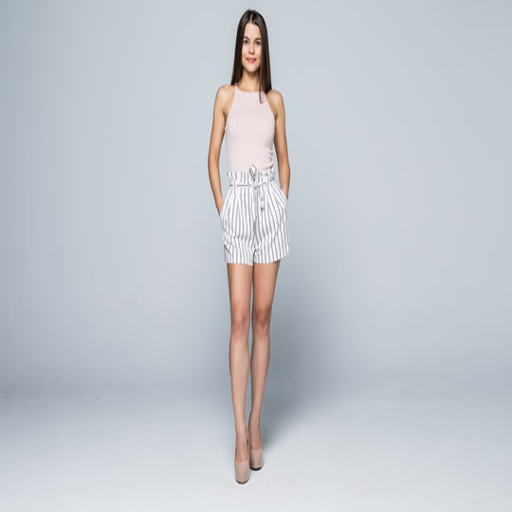

In [ ]:
# ashok = load_image('/content/drive/MyDrive/virtual_try_on/IMG-1816.JPG').convert("RGB")
ashok = load_image('https://t3.ftcdn.net/jpg/02/24/60/28/360_F_224602847_gILYDNo6uswdqEQO7nnBmBNFwF4AX6B4.jpg').convert("RGB")
ashok.resize((512, 512))

In [ ]:
ashok.size

(540, 360)

**Load the clothing image**

In [ ]:
# ip_image = load_image('/content/drive/MyDrive/virtual_try_on/shirt.png').convert("RGB")

# ip_image.resize((512, 512))

**Create the mask image**

To create the mask image we're going to use a [body segmentation tool](https://github.com/TonyAssi/Segment-Body) that will do it automatically

In [ ]:
! git clone https://github.com/TonyAssi/Segment-Body.git
%cd /content/Segment-Body
! pip install -r requirements.txt
! cp ./SegBody.py ..
%cd ..

Cloning into 'Segment-Body'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 14.29 KiB | 14.29 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/Segment-Body
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.8 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055390 sha2

In [ ]:
from SegBody import segment_body
# seg_image, mask_image = segment_body(ashok, face=False)
# mask_image.resize((512, 512))

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 75443.73KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


**Generate image**

In [ ]:
pipeline.set_ip_adapter_scale(1.0)
# images = pipeline(
#     prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
#     negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
#     image=ashok,
#     mask_image=mask_image,
#     ip_adapter_image=ip_image,
#     strength=0.99,
#     guidance_scale=7.5,
#     num_inference_steps=100,
# ).images
# images[0]

In [ ]:
# images[0]

In [ ]:
# images[0].size


**Virtual Try-On Function**

Now lets put it all together into a function so that all you need to do is pass the image and the clothing

In [ ]:
def virtual_try_on(img, clothing, prompt, negative_prompt, ip_scale=1.0, strength=0.99, guidance_scale=7.5, steps=100):
    _, mask_img = segment_body(img, face=False)
    pipeline.set_ip_adapter_scale(ip_scale)
    images = pipeline(
        prompt=prompt,
        negative_prompt=negative_prompt,
        image=img,
        mask_image=mask_img,
        ip_adapter_image=clothing,
        strength=strength,
        guidance_scale=guidance_scale,
        num_inference_steps=steps,
    ).images
    return mask_img, images[0]

In [ ]:
image = load_image('https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/jpFBKqYB3BtAW26jCGJKL.jpeg').convert("RGB")
ip_image = load_image('https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/NL6mAYJTuylw373ae3g-Z.jpeg').convert("RGB")

In [ ]:
from IPython.display import display


 - https://i.pinimg.com/550x/86/35/20/863520471e8fb5ad7984e944431d38f9.jpg
 -

# Try here

In [ ]:
# image = load_image(input("Enter the person's image URL: ")).convert("RGB")
# ip_image = load_image(input("Enter the clothing URL: ")).convert("RGB")
# mask_image, result = virtual_try_on(img=image,
#                clothing=ip_image,
#                prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
#                negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings")
# display(mask_image)
# display(result)


# server

In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install pydantic
!pip install requests
!pip install pyngrok
!pip install nest-asyncio
!pip install cloudinary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cloudinary: filename=cloudinary-1.41.0-py3-none-any.whl size=139738 sha256=0aa0c217a53a0efd46e800fd573ddf58a18ed500040a419146c3b3e44b2decef
  Stored in directory: /root/.cache/pip/wheels/4a/55/5f/756f34a12b7e3c2923b8dbe52d02299d23bd91a50948fe0929
Successfully built cloudinary


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import Optional
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio
import os
import cloudinary
import cloudinary.uploader

cloudinary.config(
    cloud_name="chatappjeevanneupane",
    api_key="241364295355246",
    api_secret="hPqBSyifpFh1pMwqe1hea_NEQW4"
)

app = FastAPI()
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

class InputURLs(BaseModel):
    person: str
    cloth: str
    # text: Optional[str] = None
    # strength: Optional[float] = 0.99
    # guidance_scale: Optional[float] = 7.5




@app.post("/try_on1")
def do_try_on(request:InputURLs):
    image, ip_image = load_image(request.person), load_image(request.cloth)
    mask_image, result = virtual_try_on(img=image,
                 clothing=ip_image,
                 prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
                 negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
    )
    display(mask_image)
    display(result)
    result.save(f"out.jpg")
    response = cloudinary.uploader.upload(
                    "out.jpg",
                    folder="test",
                    use_filename=True,
                    unique_filename=True
                )

    return {"cloudinary_urls": response['secure_url']}




os.environ["NGROK_AUTHTOKEN"] = "2ou2c1Bii8BIoxgpVvLbyrGRrhq_39atbrbFQZoZsf6o7MYsQ"
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)